In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('titanic_train.csv')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
##EDA 

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
target_col = 'Survived'
cat_cols = ['Pclass','Sex','Embarked']
num_cols = ['Age','SibSp','Parch','Fare']
drop_cols = ['PassengerId','Name','Ticket','Cabin']


univariate Analysis

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


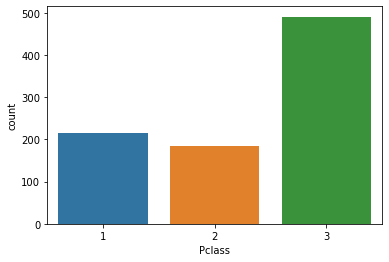

Sex
female    314
male      577
Name: Sex, dtype: int64


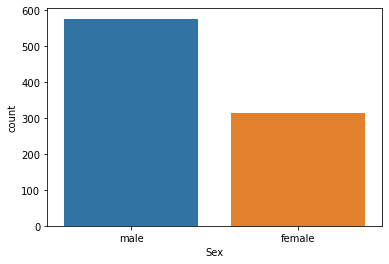

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


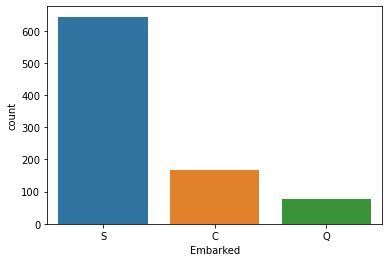

In [8]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data = df, x=col)
    plt.show()

for col in cat_cols:
    cat_analyze(col)

Age


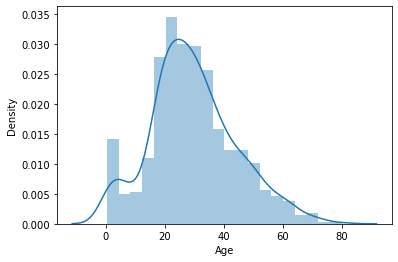

SibSp


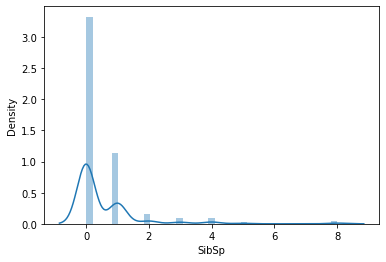

Parch


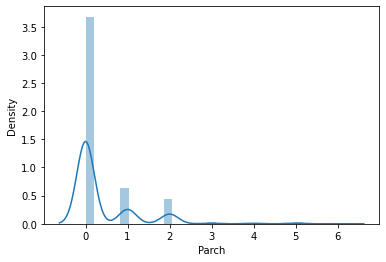

Fare


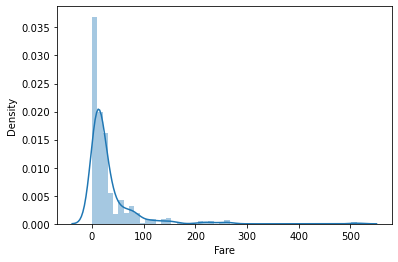

In [9]:
def num_analyze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()

for col in num_cols:
    num_analyze(col)

Bivariate Analysis

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


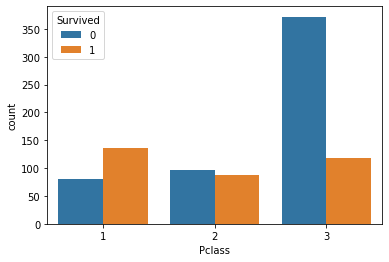

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


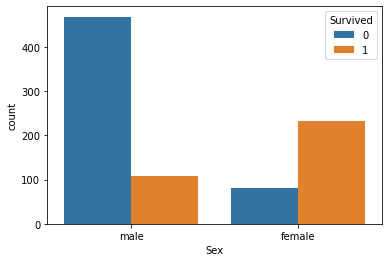

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


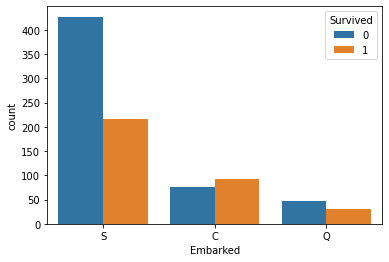

In [10]:
def cat_bivariate(col):
    print(col)
    print(df.groupby(target_col)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target_col)
    plt.show()
for col in cat_cols:
    cat_bivariate(col)

Age


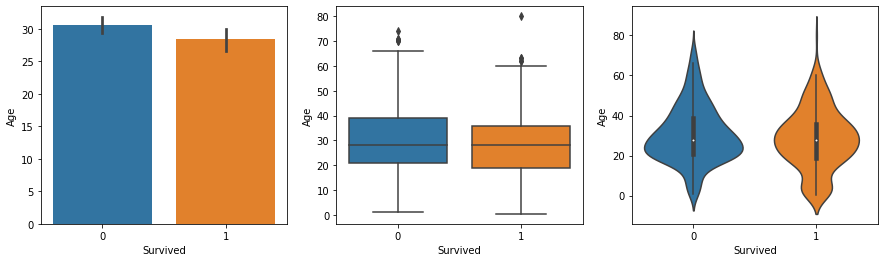

SibSp


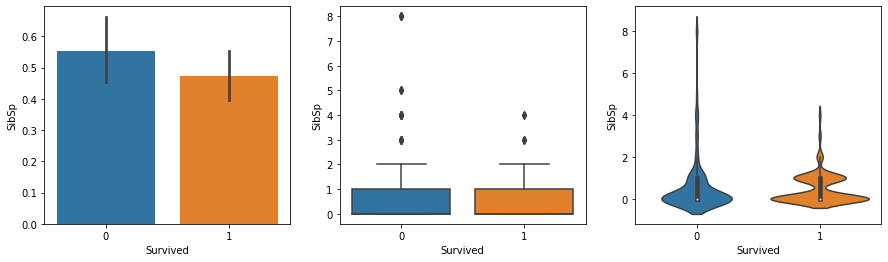

Parch


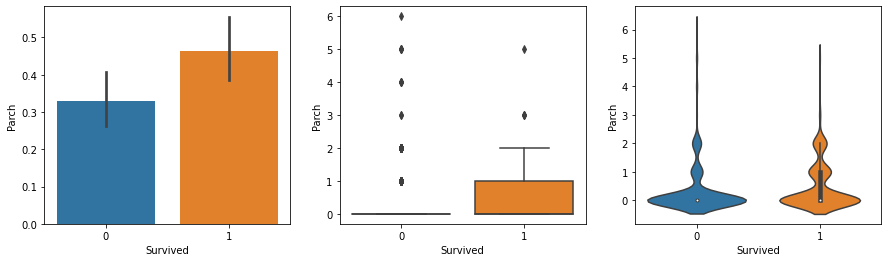

Fare


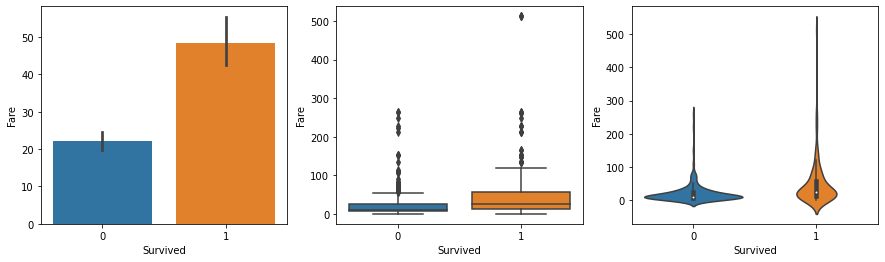

In [11]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)    
    sns.barplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_col, y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=target_col, y=col)
    plt.show()
for col in num_cols:
    num_bivariate(col)


<AxesSubplot:>

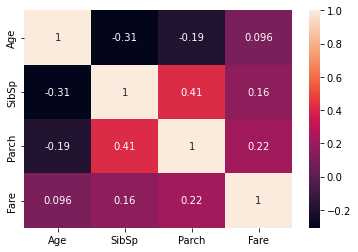

In [12]:
sns.heatmap(df[num_cols].corr(),annot=True)

In [13]:
#Missing data identification

In [14]:
pd.isnull(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
pd.isnull(df).sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [17]:
100*pd.isnull(df).sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Missing Data Strategy 
identify missing data
discard the columns having too much of missing data(>25%)
treat/impute the missing entries
     try to fill fake entries which doesn't impact overall data
         fill using mean values(num data)
         fill using some imputers(cat data)
discard the rows having missing entries, if the missing entries are too low(<5%)


<AxesSubplot:>

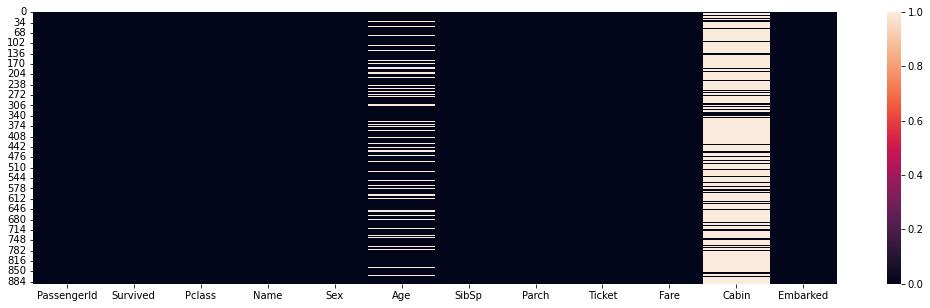

In [18]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

In [19]:
df.drop('Cabin',axis=1,inplace=True)

In [20]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

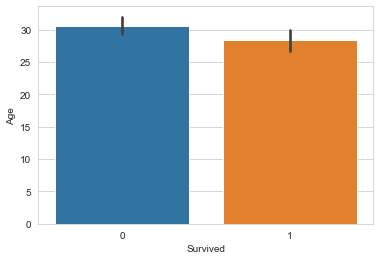

In [21]:
sns.barplot(data=df,x='Survived',y='Age')

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df['Age'].mean()

29.69911764705882

In [24]:
df['Age'].fillna(df['Age'].mean()).mean()

29.699117647058763

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

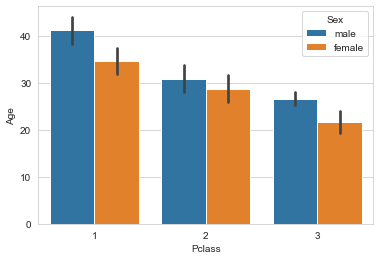

In [25]:
sns.barplot(data=df,y='Age',x='Pclass',hue='Sex')

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
target_col='Survived'
cat_cols=['Pclass','Sex']
num_cols=['Age','SibSp','Parch','Fare']
drop_cols=['PassengerId','Name']

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [29]:
df['PassengerId'].nunique()

891

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


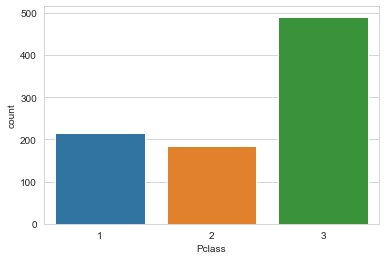

Sex
male      577
female    314
Name: Sex, dtype: int64


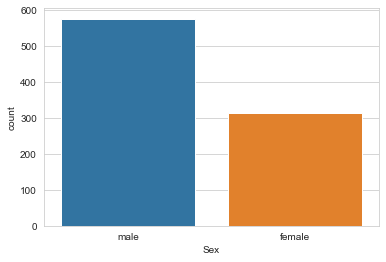

In [30]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts())
    sns.countplot(data=df,x=col)
    plt.show()

for col in cat_cols:
    cat_analyze(col)

Age


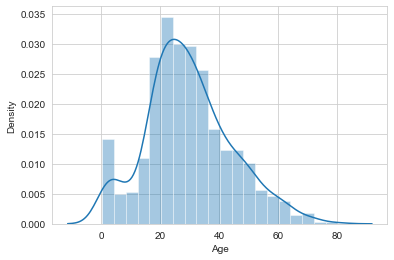

SibSp


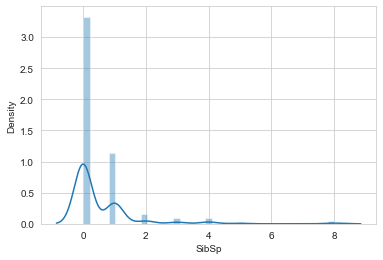

Parch


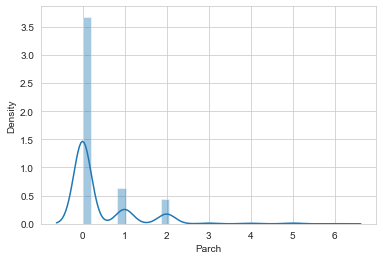

Fare


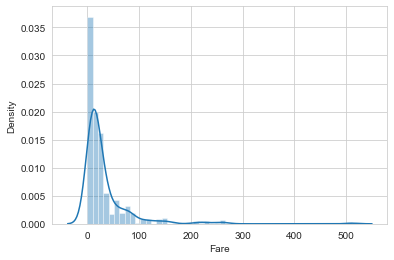

In [31]:
def num_analyze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()

for col in num_cols:
    num_analyze(col)

Bivariate Analysis

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


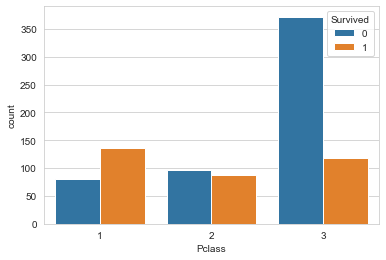

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


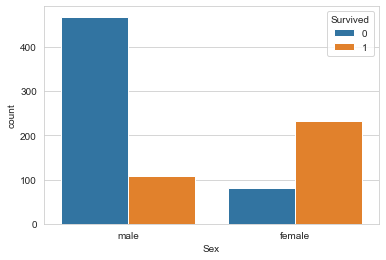

In [32]:
def cat_bivariate (col):
    print(col)
    print(df.groupby(target_col)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target_col)
    plt.show()
    
for col in cat_cols:
    cat_bivariate(col)

Age


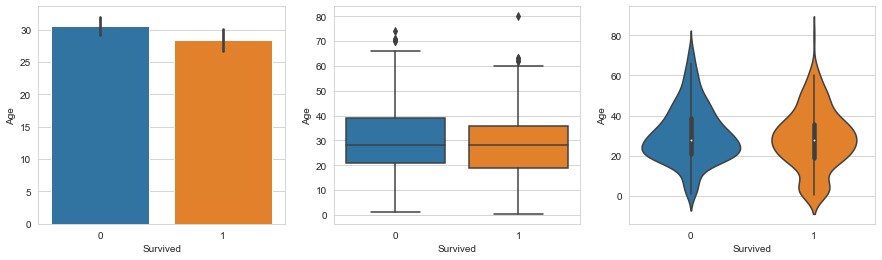

SibSp


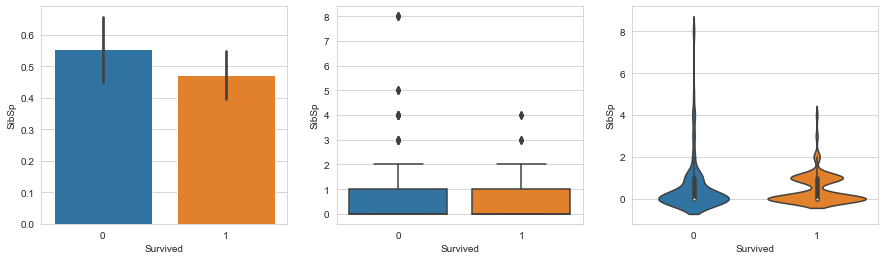

Parch


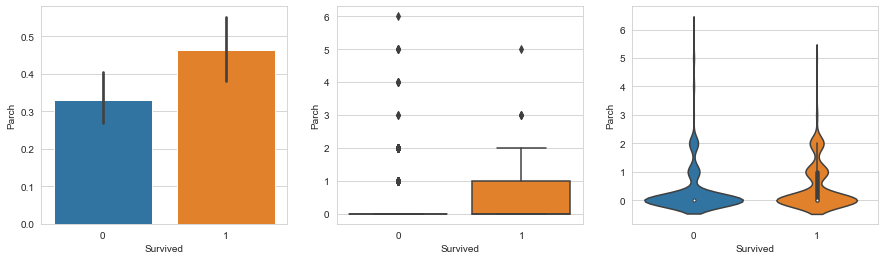

Fare


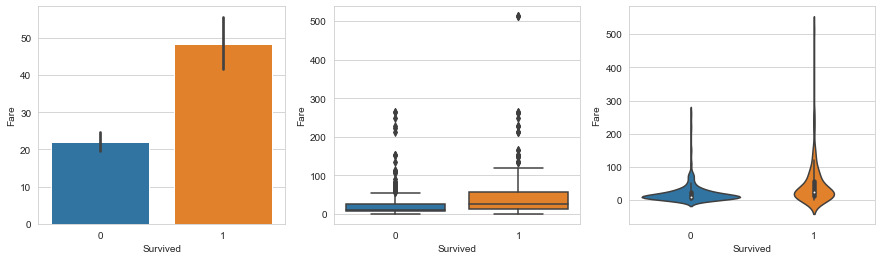

In [33]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.barplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=target_col,y=col)
    plt.show()

for col in num_cols:
    num_bivariate(col)
    
    


<AxesSubplot:>

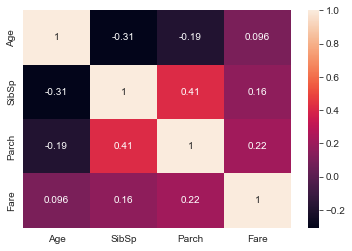

In [34]:
sns.heatmap(df[num_cols].corr(),annot=True)

Multivariate Analysis

In [35]:
from random import choice
p_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

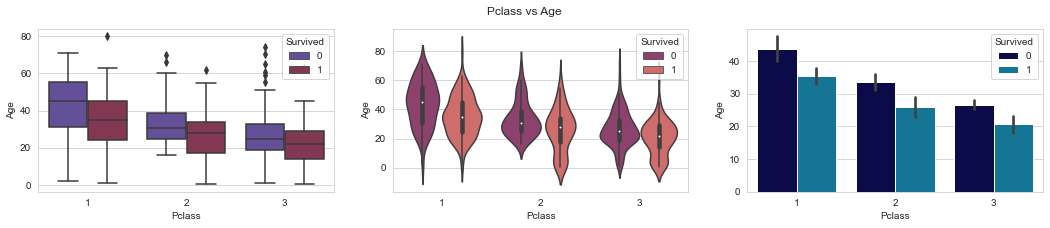

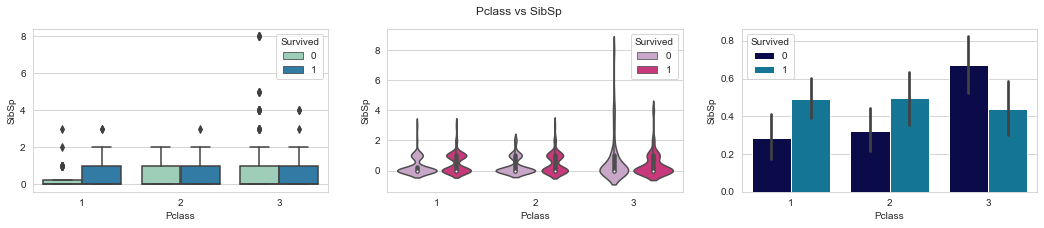

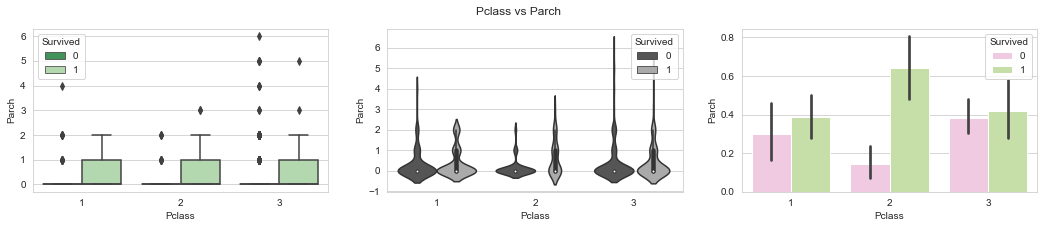

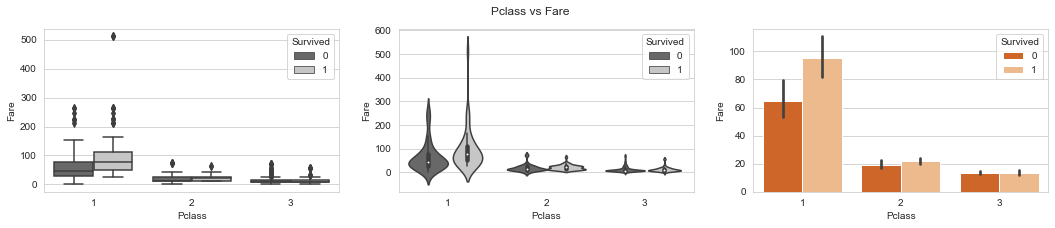

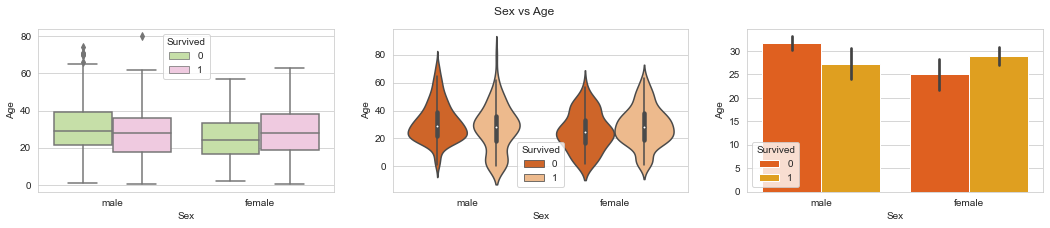

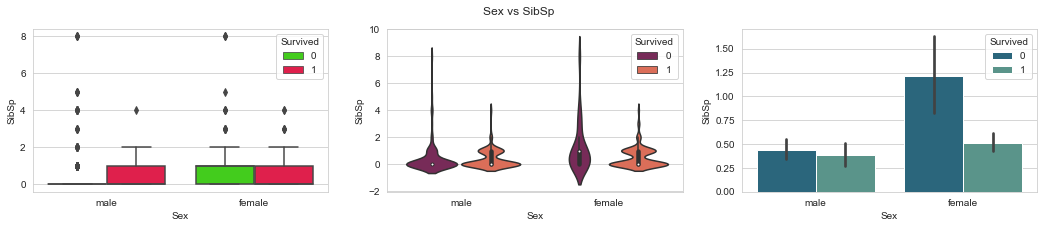

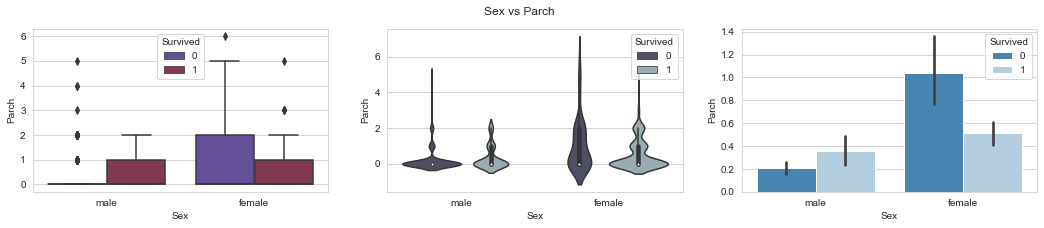

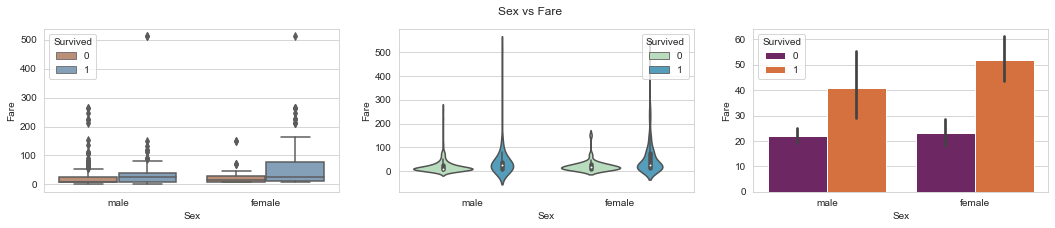

In [36]:
for col in cat_cols:
    if col==target_col:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(18,3))
        plt.suptitle(f'{col} vs {ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(
            data=df,x=col,y=ncol,
            hue = target_col,palette=choice(p_list))
        plt.subplot(1,3,2)
        sns.violinplot(
            data=df,x=col,y=ncol,
            hue = target_col,palette=choice(p_list))
        plt.subplot(1,3,3)
        sns.barplot(
            data=df,x=col,y=ncol,
            hue = target_col,palette=choice(p_list))
        plt.show()
        

In [37]:
df.drop(drop_cols, axis=1,inplace=True)


Missing Data

In [38]:
# Missing data identification
pd.isnull(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [39]:
pd.isnull(df).sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [40]:
100*pd.isnull(df).sum()/len(df)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

Missing Data Strategy

Identify Missing Data
Discard the columns having too much of missing data (>25%)
Treat/Impute the missing entries in columns
Try to fill fake entries which doesn't impact overall data
Fill using Mean Values (numerical data)
Fill using some imputers (categorical data)
Discard the rows having missing entries, if the missing entries are too less (<5%)

<AxesSubplot:>

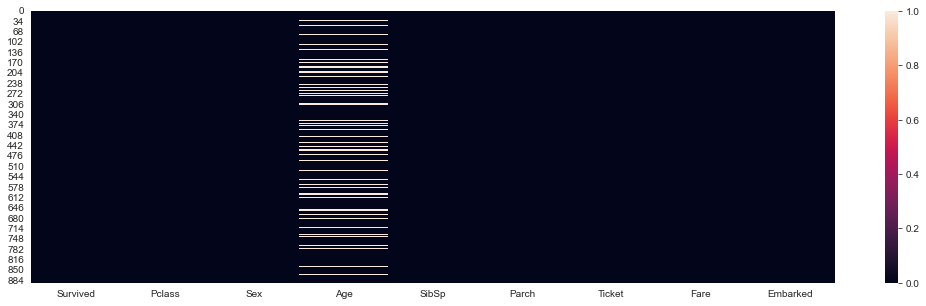

In [41]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

<AxesSubplot:>

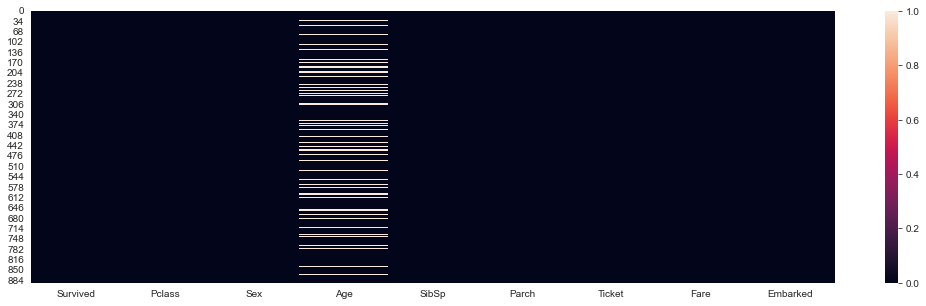

In [42]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

In [43]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

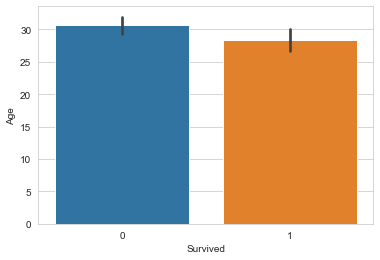

In [44]:
sns.barplot(data=df, x='Survived', y='Age')


In [45]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df['Age'].mean()

29.69911764705882

In [47]:
df['Age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [48]:
df['Age'].fillna(df['Age'].mean()).mean()

29.699117647058763

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

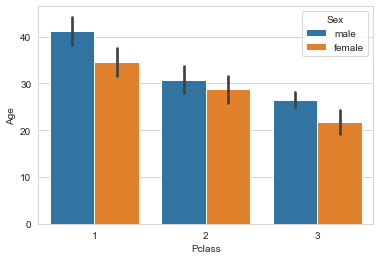

In [49]:
sns.barplot(data=df,y='Age',x='Pclass',hue='Sex')

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [51]:
# impute the fake entries in missing age information
def age_imputer(data):
    age = data['Age']
    pclass = data['Pclass']
    sex = data['Sex']

    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass)&(df['Sex']==sex)].mean()
    else:
        return age
df['Age'] = df.apply(age_imputer,axis =1)



<AxesSubplot:>

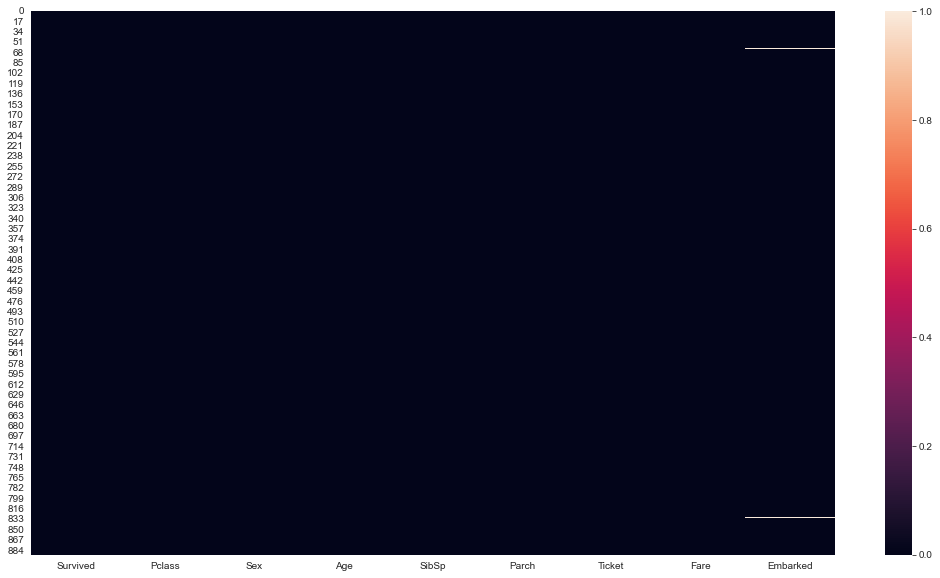

In [52]:
plt.figure(figsize=(18,10))
sns.heatmap(pd.isnull(df))

In [53]:
#Dropping missing entries which were very less on embarked column
df.dropna(inplace=True)

In [54]:
df.drop('Ticket',axis =1,inplace=True)

<AxesSubplot:>

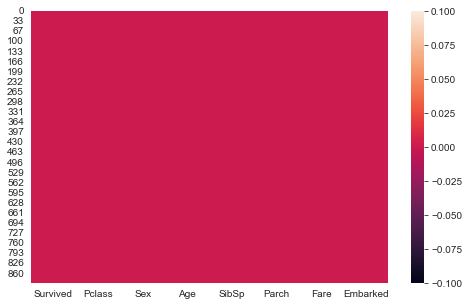

In [55]:
plt.figure(figsize=(8,5))
sns.heatmap(pd.isnull(df))

In [56]:
100*pd.isnull(df).sum()/len(df)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [57]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


String Data Preprocessing / Creating Dummy for String

In [58]:


data = pd.get_dummies(df).drop('Sex_female',axis=1)

In [59]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [60]:
target = data[target_col]
features = data.drop(target_col, axis=1)


In [61]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


why we decided logistic regresssion?
1. initially we thought of doing with pair plot, but sice it is a cat datain target, its not helpful
2. since its binary cat target and features are mixtures of num and cat both,then i can think of logistic regression(classification)

Machine Learning Template

Data Splitting

In [63]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=101)

Model Creation & Training

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

Model Evaluation

In [65]:
print(round(100 * model.score(xtest,ytest)),'%')

83 %


In [66]:
print(ytest.shape)
ytest.value_counts()


(223,)


0    136
1     87
Name: Survived, dtype: int64

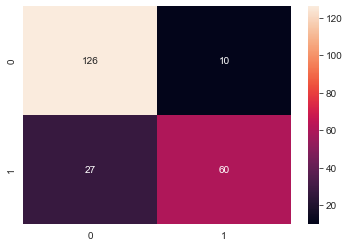

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [67]:
# confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
ytest_pred = model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred),annot = True,fmt='d')
plt.show()

print(classification_report(ytest,ytest_pred))


In [68]:
pd.Series(ytest_pred).value_counts()

0    153
1     70
dtype: int64

Improving the model

1.By balancing the dataset 
2.By hyperparameter tuning 
3.Cross validation

In [69]:
# Putting class weights
model1= LogisticRegression(class_weight = {0:0.9,1:0.6},random_state=101)
model1.fit(xtrain,ytrain)

print(classification_report(ytest,model1.predict(xtest)))

#this method did not work

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       136
           1       0.90      0.62      0.73        87

    accuracy                           0.83       223
   macro avg       0.85      0.79      0.80       223
weighted avg       0.84      0.83      0.82       223



In [70]:
# Hyperparameter
for algo in ['newton-cg','lbfgs','liblinear','sag','saga']:
    print(algo)
    model_algo= LogisticRegression(random_state=101, solver =algo,tol=1,C=1)
    model_algo.fit(xtrain,ytrain)
    print(classification_report(ytest,model_algo.predict(xtest)))


newton-cg
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

lbfgs
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

liblinear
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       136
           1       0.75      0.34      0.47        87

    accuracy                           0.70       223
   macro avg       0.72      0.64      0.63       223
weighted avg       0.71      0.70      0.67     

In [71]:
# This model is not really improving so we should not consider it,as the score was low as compared to the original

Decision Tree Algorithm

In [72]:
xtrain, xtest, ytrain,ytest

(     Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_C  \
 127       3  24.000000      0      0   7.1417         1           0   
 133       2  29.000000      1      0  26.0000         0           0   
 619       2  26.000000      0      0  10.5000         1           0   
 439       2  31.000000      0      0  10.5000         1           0   
 374       3   3.000000      3      1  21.0750         0           0   
 ..      ...        ...    ...    ...      ...       ...         ...   
 576       2  34.000000      0      0  13.0000         0           0   
 840       3  20.000000      0      0   7.9250         1           0   
 338       3  45.000000      0      0   8.0500         1           0   
 524       3  26.507589      0      0   7.2292         1           1   
 865       2  42.000000      0      0  13.0000         0           0   
 
      Embarked_Q  Embarked_S  
 127           0           1  
 133           0           1  
 619           0           1  
 439      

In [85]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
print(classification_report(ytest, model_dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       136
           1       0.66      0.69      0.67        87

    accuracy                           0.74       223
   macro avg       0.73      0.73      0.73       223
weighted avg       0.74      0.74      0.74       223



In [92]:
pd.DataFrame(model_dt.feature_importances_, index = xtrain.columns, columns=['Importance']).\
    sort_values(by='Importance', ascending=False)

,Importance
Sex_male,0.298897
Fare,0.250051
Age,0.248270
Pclass,0.098857
SibSp,0.058562
Parch,0.027915
Embarked_C,0.011978
Embarked_S,0.005470
Embarked_Q,0.000000


In [79]:
imp_cols = ['Sex_male','Fare','Age']

In [80]:
model_dt2 = DecisionTreeClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest, model_dt2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       136
           1       0.63      0.68      0.66        87

    accuracy                           0.72       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.73      0.72      0.72       223



In [81]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(xtrain,ytrain)
print(classification_report(ytest, model_rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       136
           1       0.80      0.74      0.77        87

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



In [91]:
pd.DataFrame(model_rf.feature_importances_, index = xtrain.columns, columns=['Importance']).\
    sort_values(by='Importance', ascending=False)


,Importance
Fare,0.274908
Age,0.262307
Sex_male,0.250345
Pclass,0.084220
SibSp,0.050073
Parch,0.037446
Embarked_S,0.018026
Embarked_C,0.014285
Embarked_Q,0.008388


In [83]:
model_rf2 = RandomForestClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest, model_rf2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       136
           1       0.77      0.68      0.72        87

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



After applying various algorithms, it observed that the bst score 

In [90]:
pd.to_pickle(model_rf2, 'SurvivalPredictionRF.pickle')
pd.to_pickle(model , 'SurvivalPredictionLogisticR.pickle')